<a href="https://colab.research.google.com/github/ShoroukGamal/machine-learning-projects/blob/main/supervised/LogisticRegression/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(["PassengerId", "Cabin"], axis=1, inplace=True)

In [ ]:
df.drop(["Name", "Ticket"], axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

111

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Age,104
Embarked,2
Survived,0
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0


In [ ]:
for col in ["Sex", "Embarked"]:
    print(f"{col}: {df[col].unique()}")
    print(f"{col}: {df[col].nunique()}")

Sex: ['male' 'female']
Sex: 2
Embarked: ['S' 'C' 'Q' nan]
Embarked: 3


In [ ]:
#df.dropna(axis= 0, inplace=True)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan ,strategy='mean')
df["Age"] = imputer.fit_transform(df[["Age"]])
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
df.dropna(axis= 0, inplace=True)
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
for col in ["Sex", "Embarked"]:
    df[col] = lb.fit_transform(df[col])

In [ ]:
df.shape

(778, 8)

In [ ]:
df["Pclass"].value_counts()

,count
Pclass,
3,404
1,210
2,164


In [ ]:
df["SibSp"].value_counts()

,count
SibSp,
0,511
1,201
2,27
4,18
3,14
5,5
8,2


In [ ]:
df["Parch"].value_counts()

,count
Parch,
0,574
1,114
2,75
5,5
3,5
4,4
6,1


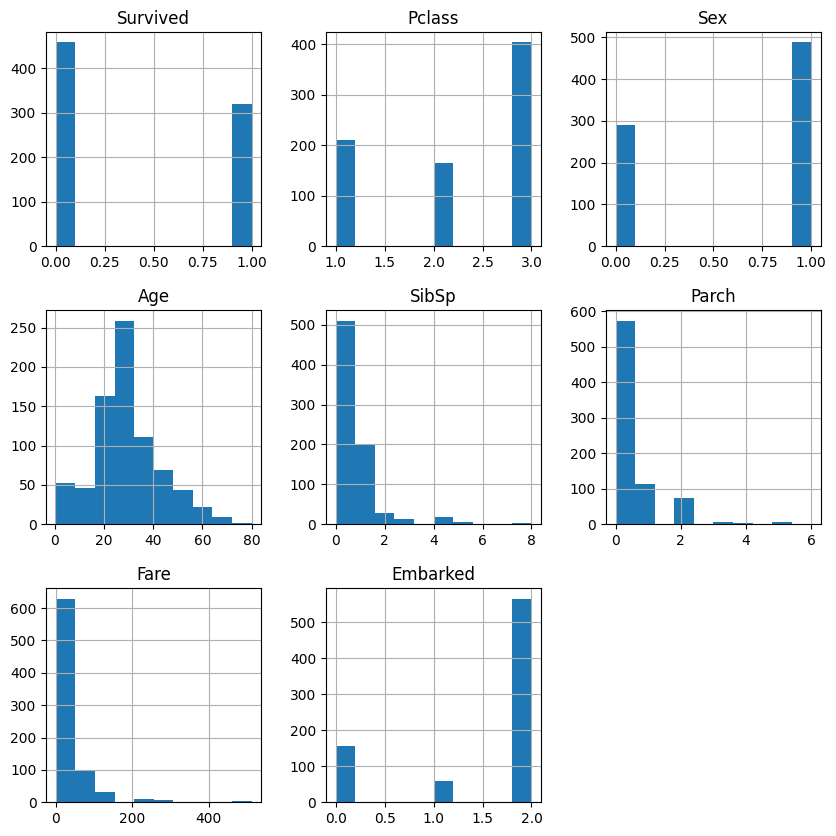

In [ ]:
df.hist(figsize=(10,10))
plt.show()


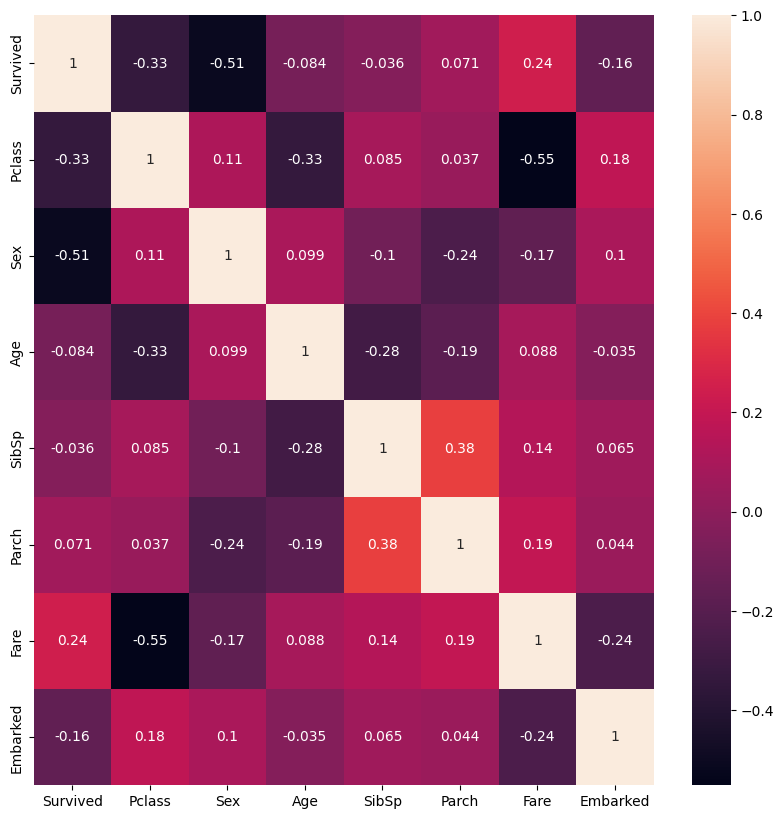

In [ ]:
df_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_matrix, annot=True)
plt.show()

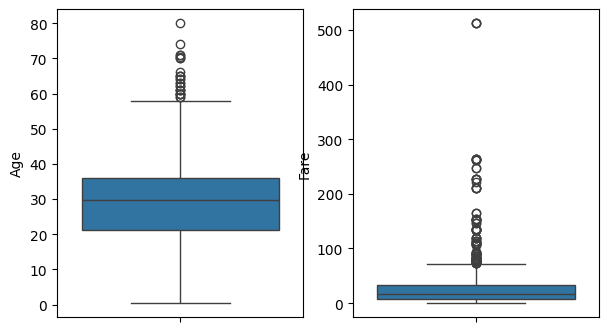

In [ ]:
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
sns.boxplot(df['Age'])

plt.subplot(1,2,2)
sns.boxplot(df['Fare'])

plt.show()

In [ ]:
df_new = df[df["Age"] < 50]
df_new = df_new[df_new["Fare"] < 50]

In [ ]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
2,1,3,0,26.000000,0,0,7.9250,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.812751,0,0,8.4583,1
7,0,3,1,2.000000,3,1,21.0750,2


In [ ]:
df_new.reset_index(drop=True, inplace=True)

In [ ]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,3,0,26.000000,0,0,7.9250,2
2,0,3,1,35.000000,0,0,8.0500,2
3,0,3,1,29.812751,0,0,8.4583,1
4,0,3,1,2.000000,3,1,21.0750,2


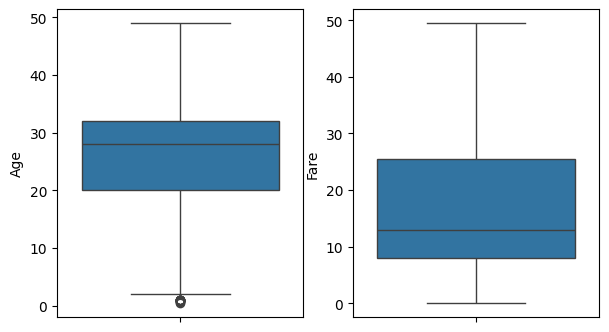

In [ ]:
plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
sns.boxplot(df_new['Age'])

plt.subplot(1,2,2)
sns.boxplot(df_new['Fare'])

plt.show()

In [ ]:
df_new.shape

(580, 8)

In [ ]:
df_new.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
575,0,3,0,39.000000,0,5,29.125,1
576,1,1,0,19.000000,0,0,30.000,2
577,0,3,0,29.812751,1,2,23.450,2
578,1,1,1,26.000000,0,0,30.000,0
579,0,3,1,32.000000,0,0,7.750,1


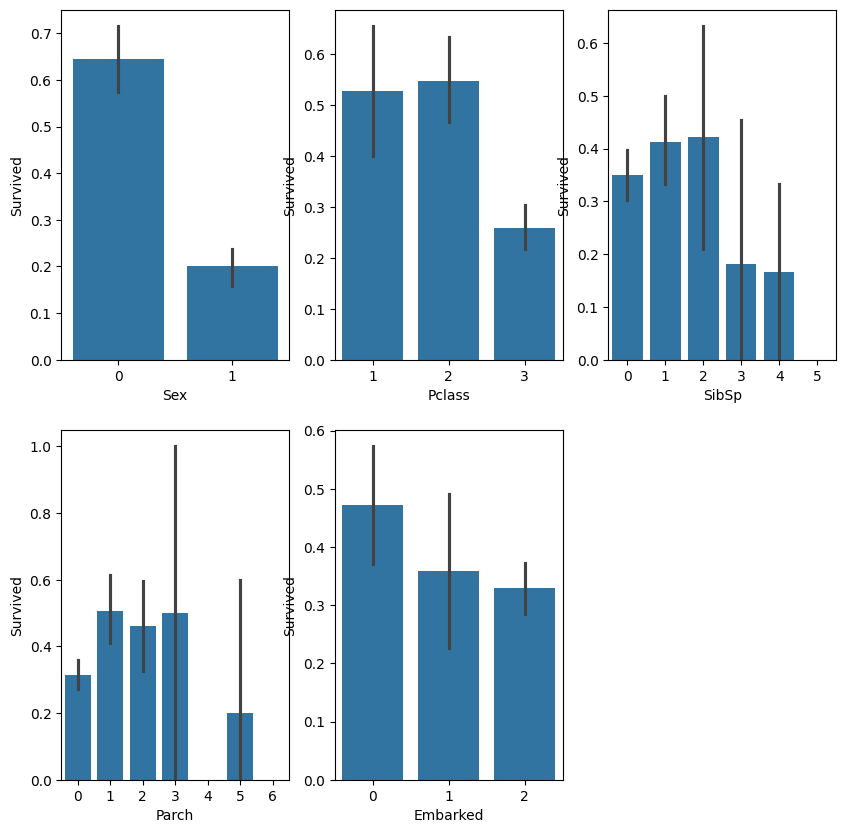

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.barplot(x='Sex', y='Survived', data=df_new)

plt.subplot(2,3,2)
sns.barplot(x='Pclass', y='Survived', data=df_new)

plt.subplot(2,3,3)
sns.barplot(x='SibSp', y='Survived', data=df_new)

plt.subplot(2,3,4)
sns.barplot(x='Parch', y='Survived', data=df_new)

plt.subplot(2,3,5)
sns.barplot(x='Embarked', y='Survived', data=df_new)

#plt.subplot(2,3,6)
#sns.barplot(x='Age', y='Survived', data=df_new)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe_df = pd.DataFrame(ohe.fit_transform(df_new[["Pclass"]]), columns=ohe.get_feature_names_out(['Pclass']))

In [ ]:
ohe_df.head()

,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
ohe_df.tail()

,Pclass_1,Pclass_2,Pclass_3
575,0.0,0.0,1.0
576,1.0,0.0,0.0
577,0.0,0.0,1.0
578,1.0,0.0,0.0
579,0.0,0.0,1.0


In [ ]:
ohe_df.shape

(580, 3)

In [ ]:
for col in ohe_df.columns:
    print(col)
    df_new[col] = ohe_df[col]

Pclass_1
Pclass_2
Pclass_3


In [ ]:
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
0,0,3,1,22.000000,1,0,7.2500,2,0.0,0.0,1.0
1,1,3,0,26.000000,0,0,7.9250,2,0.0,0.0,1.0
2,0,3,1,35.000000,0,0,8.0500,2,0.0,0.0,1.0
3,0,3,1,29.812751,0,0,8.4583,1,0.0,0.0,1.0
4,0,3,1,2.000000,3,1,21.0750,2,0.0,0.0,1.0


In [ ]:
df_new.drop("Pclass", axis=1, inplace=True)

In [ ]:
df_new.isnull().sum().sort_values(ascending=False)

,0
Survived,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Pclass_1,0
Pclass_2,0
Pclass_3,0


In [ ]:
df_new.tail()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3
575,0,0,39.000000,0,5,29.125,1,0.0,0.0,1.0
576,1,0,19.000000,0,0,30.000,2,1.0,0.0,0.0
577,0,0,29.812751,1,2,23.450,2,0.0,0.0,1.0
578,1,1,26.000000,0,0,30.000,0,1.0,0.0,0.0
579,0,1,32.000000,0,0,7.750,1,0.0,0.0,1.0


In [ ]:
df_new.shape

(580, 10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_new[["Age", "Fare"]] = scaler.fit_transform(df_new[["Age", "Fare"]])

In [ ]:
df_new["Fare"].min(), df_new["Fare"].max()

(0.0, 0.9999999999999999)

In [ ]:
df["Age"].min(), df["Age"].max()

(0.42, 80.0)

In [ ]:
x = df_new.drop("Survived", axis=1)
y = df_new["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)
print(classification_report(y_test, y_pred))

[[56 11]
 [18 31]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.79        67
           1       0.74      0.63      0.68        49

    accuracy                           0.75       116
   macro avg       0.75      0.73      0.74       116
weighted avg       0.75      0.75      0.75       116



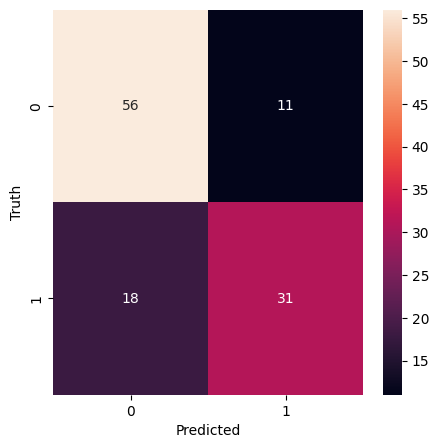

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()